In [154]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numpy import random
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
np.set_printoptions(suppress=True)
from numpy import exp
from numpy.random import seed
seed(1)
from math import sqrt
import keras
import scipy as sp
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
from keras import initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, BatchNormalization, Embedding


In [155]:
#efining function for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100   

In [156]:
# anomaly detection using GAN method 1. Make the whole dataset onedimensional array and check two distance of generated latent array. 
# first distance is within the anomalies which should be minimum
# second distance is from the normal which will be maximum 

In [237]:
#load the dataset 
synthetic=pd.read_csv('synthetic.csv')
synthetic_gan=synthetic.iloc[:,0:10]


In [512]:
discriminator=Sequential()
discriminator.add(Dense(128,  kernel_initializer = "he_uniform", input_dim = 10))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(64,  kernel_initializer = "he_uniform"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(32,  kernel_initializer = "he_uniform"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(16,  kernel_initializer = "he_uniform"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation = "sigmoid"))
discriminator.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

In [513]:
LEAKY_RELU = LeakyReLU(0.4)   # Empirical hyperparameter
generator = Sequential()
generator.add(Dense(32, kernel_initializer = "he_uniform", input_dim=30))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(64,  kernel_initializer = "he_uniform"))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128,  kernel_initializer = "he_uniform"))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(10, activation = "sigmoid"))


In [514]:
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [515]:
from tensorflow.python.keras.backend import set_session
from tensorflow.python.keras.models import load_model
EPOCHS = 5
BATCH=25
X_MIN=0
X_MAX=1
SAMPLE_SIZE=1000
SAMPLE_LEN=10
NOISE = np.random.normal(X_MIN, X_MAX, size = (SAMPLE_SIZE, SAMPLE_LEN))
ONES = np.ones((SAMPLE_SIZE))
ZEROS = np.zeros((SAMPLE_SIZE))
print("epoch | dis. loss | dis. acc | gen. loss | gen. acc")
print("------+-----------+----------+-----------+----------")
 
fig = plt.figure(figsize = (8, 12))
ax_index = 1
for e in range(EPOCHS):
    for k in range(SAMPLE_SIZE//BATCH):
        # Addestra il discriminatore a riconoscere le sinusoidi vere da quelle prodotte dal generatore
        n = np.random.randint(0, SAMPLE_SIZE, size = BATCH)
        # Ora prepara un batch di training record per il discriminatore
        p = generator.predict(NOISE[n])
        x = np.concatenate((synthetic_gan.to_numpy()[n], p))
        y = np.concatenate((ONES[n], ZEROS[n]))
        d_result = discriminator.train_on_batch(x, y)
        discriminator.trainable = False
        g_result = gan.train_on_batch(NOISE[n], ONES[n])
        discriminator.trainable = True
        print(f" {e:04n} |  {d_result[0]:.5f}  |  {d_result[1]:.5f} |  {g_result[0]:.5f}  |  {g_result[1]:.5f}")
    # At 3, 13, 23, ... plots the last generator prediction
    '''if e % 10 == 3:
        ax = fig.add_subplot(8, 1, ax_index)
        plt.plot(X_COORDS, p[-1])
        ax.xaxis.set_visible(False)
        plt.ylabel(f"Epoch: {e}")
        ax_index += 1'''


# Plots a curve generated by the GAN
#y = generator.predict(uniform(X_MIN, X_MAX, size = (1, SAMPLE_LEN)))[0]
#ax = fig.add_subplot(8, 1, ax_index)
#plt.plot(X_COORDS, y)
#y

epoch | dis. loss | dis. acc | gen. loss | gen. acc
------+-----------+----------+-----------+----------
 0000 |  0.75536  |  0.48000 |  0.51679  |  1.00000
 0000 |  0.72491  |  0.50000 |  0.44563  |  1.00000
 0000 |  0.73067  |  0.50000 |  0.39989  |  1.00000
 0000 |  0.75863  |  0.50000 |  0.35876  |  1.00000
 0000 |  0.76619  |  0.50000 |  0.35823  |  1.00000
 0000 |  0.81148  |  0.50000 |  0.33527  |  1.00000
 0000 |  0.85804  |  0.50000 |  0.32652  |  1.00000
 0000 |  0.83735  |  0.50000 |  0.32381  |  1.00000
 0000 |  0.85118  |  0.50000 |  0.31063  |  1.00000
 0000 |  0.90291  |  0.50000 |  0.29984  |  1.00000
 0000 |  0.87775  |  0.50000 |  0.29275  |  1.00000
 0000 |  0.91532  |  0.50000 |  0.29397  |  1.00000
 0000 |  0.95854  |  0.50000 |  0.27525  |  1.00000
 0000 |  0.99013  |  0.50000 |  0.26043  |  1.00000
 0000 |  0.95016  |  0.50000 |  0.28212  |  1.00000
 0000 |  0.93684  |  0.50000 |  0.26892  |  1.00000
 0000 |  0.94270  |  0.50000 |  0.27324  |  1.00000
 0000 |  0.

<Figure size 576x864 with 0 Axes>

In [516]:
generator_result= generator.predict(synthetic_gan)


In [518]:
generator_result_df=pd.DataFrame(generator_result)
generator_result_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.906895,0.980317,0.482990,0.763943,0.406458,0.402557,0.763293,0.507880,0.868015,0.713534
std,0.155988,0.023375,0.218087,0.289174,0.345329,0.324096,0.234492,0.317977,0.162897,0.248295
min,0.022157,0.787571,0.071563,0.008698,0.000117,0.000113,0.005849,0.009193,0.035111,0.039734
25%,0.915338,0.979123,0.305409,0.663166,0.060766,0.088409,0.644883,0.209523,0.833116,0.561579
50%,0.967505,0.987266,0.471757,0.907411,0.330524,0.346380,0.850132,0.504542,0.932494,0.807992
75%,0.984826,0.991753,0.661829,0.966984,0.741997,0.700708,0.947908,0.821976,0.967580,0.909559
max,0.995425,0.997266,0.988808,0.996319,0.983510,0.984258,0.997111,0.995011,0.992723,0.995530


In [519]:
synthetic_gan.describe()

,one,two,three,four,five,six,seven,eight,nine,ten
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491362,0.490200,0.509077,0.497362,0.586120,0.514636,0.508270,0.457541,0.477685,0.495760
std,0.259138,0.251931,0.256606,0.263562,0.334658,0.317470,0.278483,0.220129,0.241432,0.211677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014495
25%,0.287458,0.291449,0.337802,0.256147,0.169680,0.142587,0.246021,0.245539,0.291452,0.329904
50%,0.492070,0.488656,0.510077,0.497537,0.782019,0.537953,0.465679,0.515619,0.387753,0.488891
75%,0.694192,0.686531,0.686914,0.731949,0.847956,0.856512,0.804935,0.626757,0.723674,0.659528
max,0.994431,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988732,1.000000


In [520]:
#print(mean_absolute_percentage_error(synthetic_gan.iloc[:,0].to_numpy().reshape(1000,1),generator_result[:,0].reshape(1000,1)))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(synthetic_gan.iloc[:,0].to_numpy().reshape(1000,1), generator_result[:,0].reshape(1000,1)))

0.24059449004361852


In [521]:
print(mean_squared_error(synthetic_gan.iloc[:,0].to_numpy().reshape(1000,1), generator_result[:,0].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,1].to_numpy().reshape(1000,1), generator_result[:,1].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,2].to_numpy().reshape(1000,1), generator_result[:,2].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,3].to_numpy().reshape(1000,1), generator_result[:,3].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,4].to_numpy().reshape(1000,1), generator_result[:,4].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,5].to_numpy().reshape(1000,1), generator_result[:,5].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,6].to_numpy().reshape(1000,1), generator_result[:,6].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,7].to_numpy().reshape(1000,1), generator_result[:,7].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,8].to_numpy().reshape(1000,1), generator_result[:,8].reshape(1000,1)))
print(mean_squared_error(synthetic_gan.iloc[:,9].to_numpy().reshape(1000,1), generator_result[:,9].reshape(1000,1)))


0.24059449004361852
0.3019406361855148
0.12018936405131114
0.2232255948948731
0.44586946164132746
0.3031120698253162
0.23243026958066226
0.16967644264348627
0.23227227793927316
0.1585421947132239


In [522]:
#generator_result[:,2].reshape(1000,1)

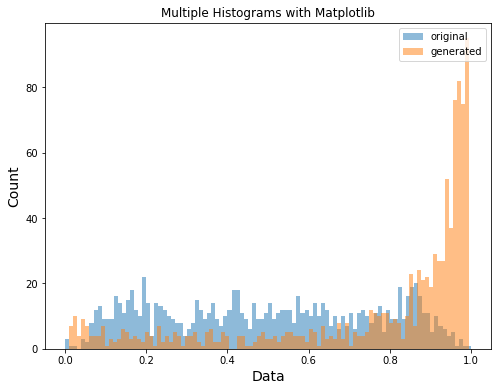

In [523]:
original=synthetic_gan.iloc[:,3].to_numpy().reshape(1000,1)
generated=generator_result[:,3].reshape(1000,1)
plt.figure(figsize=(8,6))
plt.hist(original, bins=100, alpha=0.5, label="original")
plt.hist(generated, bins=100, alpha=0.5, label="generated")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")

In [524]:
#
a1 = np.random.normal(1, .20, 1000)
a2 = np.random.normal(10, 1.20, 1000)
a3 = np.random.normal(5, 3.20, 1000)
a4 = np.random.normal(5, 0.5, 1000)
a5 = np.random.normal(3, 0.5, 1000)

a1=np.append(a1,np.random.uniform(low=20, high=33.3, size=(120,)) ).reshape(1120,1)
a2=np.append(a2,np.random.uniform(low=0.00000055, high=.00003, size=(120,)) ).reshape(1120,1)
a3=np.append(a3,random.uniform(low=55, high=300, size=(120,)) ).reshape(1120,1)
a4=np.append(a4,random.uniform(low=400, high=500, size=(120,)) ).reshape(1120,1)
a5=np.append(a5,random.uniform(low=.0004, high=.03, size=(120,)) ).reshape(1120,1)

In [525]:
array=np.concatenate((a1,a2,a3,a4,a5), axis=1)
array

array([[  1.10876408,  10.25012435,  11.45956661,   4.64284769,
          3.26200776],
       [  1.09285394,  10.39590852,   4.53376986,   5.73834713,
          2.82914832],
       [  0.99158733,  11.96514179,   3.92854873,   5.85060754,
          3.12769027],
       ...,
       [ 21.79717139,   0.00001183, 231.87932375, 446.42923262,
          0.02186668],
       [ 20.84069972,   0.00000259, 154.97697257, 450.5351852 ,
          0.0006593 ],
       [ 21.72639898,   0.00002555, 212.23555914, 454.35006931,
          0.00992384]])

In [526]:
df = pd.read_csv('synthetic.csv')
df=df.loc[df['outlier'] == "no"]
df=df.iloc[:,1:10]
df.columns

Index(['two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'], dtype='object')

In [527]:
conda install scipy==0.16.0

SyntaxError: ignored

In [ ]:
# load datasets from http://odds.cs.stonybrook.edu/
import io
from io import loadmat
loaded = io.loadmat('shuttle.mat')
loaded.keys()

In [ ]:
loaded['X'].shape

In [ ]:
first=loaded['X'][:,0].reshape(49097,1)
second=loaded['X'][:,1].reshape(49097,1)
third=loaded['X'][:,2].reshape(49097,1)
fourth=loaded['X'][:,3].reshape(49097,1)
fifth=loaded['X'][:,4].reshape(49097,1)
sixth=loaded['X'][:,5].reshape(49097,1)
seventh=loaded['X'][:,6].reshape(49097,1)
eight=loaded['X'][:,7].reshape(49097,1)
nine=loaded['X'][:,8].reshape(49097,1)
#ten=loaded['X'][:,9].reshape(49097,1)
#eleven=loaded['X'][:,10].reshape(49097,1)
#twelve=loaded['X'][:,11].reshape(49097,1)
#thirteen=loaded['X'][:,12].reshape(49097,1)
#fouteen=loaded['X'][:,13].reshape(49097,1)
#fifteen=loaded['X'][:,14].reshape(49097,1)
#sixteen=loaded['X'][:,15].reshape(49097,1)
#seventeen=loaded['X'][:,16].reshape(49097,1)
#eightteen=loaded['X'][:,17].reshape(49097,1)
#nineteenth=loaded['X'][:,18].reshape(49097,1)
#twenty=loaded['X'][:,19].reshape(49097,1)
#twentyone=loaded['X'][:,20].reshape(49097,1)

y=loaded['y'].reshape(49097,1)


In [ ]:
data=np.concatenate((first, second, third, fourth, fifth, sixth, seventh, eight, nine,y), axis=1)

In [ ]:
bal=pd.DataFrame(data =data,columns=['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'eight', 'nine', 'y'])
bal1=bal.iloc[:,0:9]
bal1

In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df['x1'], density=False, bins=20)  
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df['x1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df['x1'], [25])-1.5*(np.percentile(df['x1'], [75])-np.percentile(df['x1'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df['x1'], [75])+1.5*(np.percentile(df['x1'], [75])-np.percentile(df['x1'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df['x2'], density=False, bins=20)  
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df['x2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df['x2'], [25])-1.5*(np.percentile(df['x2'], [75])-np.percentile(df['x2'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df['x2'], [75])+1.5*(np.percentile(df['x2'], [75])-np.percentile(df['x2'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df['x3'], density=False, bins=20)  
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df['x3'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df['x3'], [25])-1.5*(np.percentile(df['x3'], [75])-np.percentile(df['x3'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df['x3'], [75])+1.5*(np.percentile(df['x3'], [75])-np.percentile(df['x3'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df['x4'], density=False, bins=20)  
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df['x4'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df['x4'], [25])-1.5*(np.percentile(df['x4'], [75])-np.percentile(df['x4'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df['x4'], [75])+1.5*(np.percentile(df['x4'], [75])-np.percentile(df['x4'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df['x5'], density=False, bins=20)  
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df['x5'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df['x5'], [25])-1.5*(np.percentile(df['x5'], [75])-np.percentile(df['x5'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df['x5'], [75])+1.5*(np.percentile(df['x5'], [75])-np.percentile(df['x5'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [ ]:
df

In [ ]:
svm_model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .20).fit(df)
y_pred_20 = svm_model.predict(df)
y_pred_20

In [ ]:
svm_model_20 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .20).fit(df)
y_pred_20 = svm_model_20.predict(df)
svm_model_19 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .19).fit(df)
y_pred_19 = svm_model_19.predict(df)
svm_model_18 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .18).fit(df)
y_pred_18 = svm_model_18.predict(df)
svm_model_17 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .17).fit(df)
y_pred_17 = svm_model_17.predict(df)
svm_model_16 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .16).fit(df)
y_pred_16 = svm_model_16.predict(df)
svm_model_15 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .15).fit(df)
y_pred_15 = svm_model_15.predict(df)
svm_model_14 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .14).fit(df)
y_pred_14 = svm_model_14.predict(df)
svm_model_13 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .13).fit(df)
y_pred_13 = svm_model_13.predict(df)
svm_model_12 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .12).fit(df)
y_pred_12 = svm_model_12.predict(df)
svm_model_11 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .11).fit(df)
y_pred_11 = svm_model_11.predict(df)
svm_model_10 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .10).fit(df)
y_pred_10 = svm_model_10.predict(df)
svm_model_9 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .09).fit(df)
y_pred_9 = svm_model_9.predict(df)
svm_model_8 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .08).fit(df)
y_pred_8 = svm_model_8.predict(df)
svm_model_7 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .07).fit(df)
y_pred_7 = svm_model_7.predict(df)
svm_model_6 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .06).fit(df)
y_pred_6 = svm_model_6.predict(df)
svm_model_5 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .05).fit(df)
y_pred_5 = svm_model_5.predict(df)
svm_model_4 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .04).fit(df)
y_pred_4 = svm_model_4.predict(df)
svm_model_3 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .03).fit(df)
y_pred_3 = svm_model_3.predict(df)
svm_model_2 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .02).fit(df)
y_pred_2 = svm_model_2.predict(df)
svm_model_1 = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = .01).fit(df)
y_pred_1 = svm_model_1.predict(df)

In [ ]:
t20_percent_outliers_index = where(y_pred_20 == -1) 
t20_percent_normals_index = where(y_pred_20 == 1) 
t20_percent_outliers_df= df.iloc[t20_percent_outliers_index]
t20_percent_normals_df=df.iloc[t20_percent_normals_index]

In [ ]:
t19_percent_outliers_index = where(y_pred_19 == -1) 
t19_percent_normals_index = where(y_pred_19 == 1) 
t19_percent_outliers_df= df.iloc[t19_percent_outliers_index]
t19_percent_normals_df=df.iloc[t19_percent_normals_index]

In [ ]:
t18_percent_outliers_index = where(y_pred_18 == -1) 
t18_percent_normals_index = where(y_pred_18 == 1) 
t18_percent_outliers_df= df.iloc[t18_percent_outliers_index]
t18_percent_normals_df=df.iloc[t18_percent_normals_index]

In [ ]:
t17_percent_outliers_index = where(y_pred_17 == -1) 
t17_percent_normals_index = where(y_pred_17 == 1) 
t17_percent_outliers_df= df.iloc[t17_percent_outliers_index]
t17_percent_normals_df=df.iloc[t17_percent_normals_index]

In [ ]:
t16_percent_outliers_index = where(y_pred_16 == -1) 
t16_percent_normals_index = where(y_pred_16 == 1) 
t16_percent_outliers_df= df.iloc[t16_percent_outliers_index]
t16_percent_normals_df=df.iloc[t16_percent_normals_index]

In [ ]:
t15_percent_outliers_index = where(y_pred_15 == -1) 
t15_percent_normals_index = where(y_pred_15 == 1) 
t15_percent_outliers_df= df.iloc[t15_percent_outliers_index]
t15_percent_normals_df=df.iloc[t15_percent_normals_index]

In [ ]:
t14_percent_outliers_index = where(y_pred_14 == -1) 
t14_percent_normals_index = where(y_pred_14 == 1) 
t14_percent_outliers_df= df.iloc[t14_percent_outliers_index]
t14_percent_normals_df=df.iloc[t14_percent_normals_index]

In [ ]:
t13_percent_outliers_index = where(y_pred_13 == -1) 
t13_percent_normals_index = where(y_pred_13 == 1) 
t13_percent_outliers_df= df.iloc[t13_percent_outliers_index]
t13_percent_normals_df=df.iloc[t13_percent_normals_index]

In [ ]:
t12_percent_outliers_index = where(y_pred_12 == -1) 
t12_percent_normals_index = where(y_pred_12 == 1) 
t12_percent_outliers_df= df.iloc[t12_percent_outliers_index]
t12_percent_normals_df=df.iloc[t12_percent_normals_index]
t12_percent_normals_df.columns

In [ ]:
t11_percent_outliers_index = where(y_pred_11 == -1) 
t11_percent_normals_index = where(y_pred_11 == 1) 
t11_percent_outliers_df= df.iloc[t11_percent_outliers_index]
t11_percent_normals_df=df.iloc[t11_percent_normals_index]

In [ ]:
t10_percent_outliers_index = where(y_pred_10 == -1) 
t10_percent_normals_index = where(y_pred_10 == 1) 
t10_percent_outliers_df= df.iloc[t10_percent_outliers_index]
t10_percent_normals_df=df.iloc[t10_percent_normals_index]

In [ ]:
t9_percent_outliers_index = where(y_pred_9 == -1) 
t9_percent_normals_index = where(y_pred_9 == 1) 
t9_percent_outliers_df= df.iloc[t9_percent_outliers_index]
t9_percent_normals_df=df.iloc[t9_percent_normals_index]

In [ ]:
t8_percent_outliers_index = where(y_pred_8 == -1) 
t8_percent_normals_index = where(y_pred_8 == 1) 
t8_percent_outliers_df= df.iloc[t8_percent_outliers_index]
t8_percent_normals_df=df.iloc[t8_percent_normals_index]

In [ ]:
t7_percent_outliers_index = where(y_pred_7 == -1) 
t7_percent_normals_index = where(y_pred_7 == 1) 
t7_percent_outliers_df= df.iloc[t7_percent_outliers_index]
t7_percent_normals_df=df.iloc[t7_percent_normals_index]

In [ ]:
t6_percent_outliers_index = where(y_pred_6 == -1) 
t6_percent_normals_index = where(y_pred_6 == 1) 
t6_percent_outliers_df= df.iloc[t6_percent_outliers_index]
t6_percent_normals_df=df.iloc[t6_percent_normals_index]

In [ ]:
t5_percent_outliers_index = where(y_pred_5 == -1) 
t5_percent_normals_index = where(y_pred_5 == 1) 
t5_percent_outliers_df= df.iloc[t5_percent_outliers_index]
t5_percent_normals_df=df.iloc[t5_percent_normals_index]

In [ ]:
t4_percent_outliers_index = where(y_pred_4 == -1) 
t4_percent_normals_index = where(y_pred_4 == 1) 
t4_percent_outliers_df= df.iloc[t4_percent_outliers_index]
t4_percent_normals_df=df.iloc[t4_percent_normals_index]

In [ ]:
t3_percent_outliers_index = where(y_pred_3 == -1) 
t3_percent_normals_index = where(y_pred_3 == 1) 
t3_percent_outliers_df= df.iloc[t3_percent_outliers_index]
t3_percent_normals_df=df.iloc[t3_percent_normals_index]

In [ ]:
t2_percent_outliers_index = where(y_pred_2 == -1) 
t2_percent_normals_index = where(y_pred_2 == 1) 
t2_percent_outliers_df= df.iloc[t2_percent_outliers_index]
t2_percent_normals_df=df.iloc[t2_percent_normals_index]

In [ ]:
t1_percent_outliers_index = where(y_pred_1 == -1) 
t1_percent_normals_index = where(y_pred_1 == 1) 
t1_percent_outliers_df= df.iloc[t1_percent_outliers_index]
t1_percent_normals_df=df.iloc[t1_percent_normals_index]

In [ ]:
overall_x=df.iloc[:,0:3]
overall_y=df.iloc[:,3:5]

In [ ]:
t1_percent_outliers_x=t1_percent_outliers_df.iloc[:,0:3]
t1_percent_outliers_y=t1_percent_outliers_df.iloc[:,3:5]
t2_percent_outliers_x=t2_percent_outliers_df.iloc[:,0:3]
t2_percent_outliers_y=t2_percent_outliers_df.iloc[:,3:5]
t3_percent_outliers_x=t3_percent_outliers_df.iloc[:,0:3]
t3_percent_outliers_y=t3_percent_outliers_df.iloc[:,3:5]
t4_percent_outliers_x=t4_percent_outliers_df.iloc[:,0:3]
t4_percent_outliers_y=t4_percent_outliers_df.iloc[:,3:5]
t5_percent_outliers_x=t5_percent_outliers_df.iloc[:,0:3]
t5_percent_outliers_y=t5_percent_outliers_df.iloc[:,3:5]
t6_percent_outliers_x=t6_percent_outliers_df.iloc[:,0:3]
t6_percent_outliers_y=t6_percent_outliers_df.iloc[:,3:5]

t7_percent_outliers_x=t7_percent_outliers_df.iloc[:,0:3]
t7_percent_outliers_y=t7_percent_outliers_df.iloc[:,3:5]
t8_percent_outliers_x=t8_percent_outliers_df.iloc[:,0:3]
t8_percent_outliers_y=t8_percent_outliers_df.iloc[:,3:5]
t9_percent_outliers_x=t9_percent_outliers_df.iloc[:,0:3]
t9_percent_outliers_y=t9_percent_outliers_df.iloc[:,3:5]
t10_percent_outliers_x=t10_percent_outliers_df.iloc[:,0:3]
t10_percent_outliers_y=t10_percent_outliers_df.iloc[:,3:5]
t11_percent_outliers_x=t11_percent_outliers_df.iloc[:,0:3]
t11_percent_outliers_y=t11_percent_outliers_df.iloc[:,3:5]
t12_percent_outliers_x=t12_percent_outliers_df.iloc[:,0:3]
t12_percent_outliers_y=t12_percent_outliers_df.iloc[:,3:5]

t13_percent_outliers_x=t13_percent_outliers_df.iloc[:,0:3]
t13_percent_outliers_y=t13_percent_outliers_df.iloc[:,3:5]
t14_percent_outliers_x=t14_percent_outliers_df.iloc[:,0:3]
t14_percent_outliers_y=t14_percent_outliers_df.iloc[:,3:5]
t15_percent_outliers_x=t15_percent_outliers_df.iloc[:,0:3]
t15_percent_outliers_y=t15_percent_outliers_df.iloc[:,3:5]
t16_percent_outliers_x=t16_percent_outliers_df.iloc[:,0:3]
t16_percent_outliers_y=t16_percent_outliers_df.iloc[:,3:5]
t17_percent_outliers_x=t17_percent_outliers_df.iloc[:,0:3]
t17_percent_outliers_y=t17_percent_outliers_df.iloc[:,3:5]
t18_percent_outliers_x=t18_percent_outliers_df.iloc[:,0:3]
t18_percent_outliers_y=t18_percent_outliers_df.iloc[:,3:5]
t19_percent_outliers_x=t19_percent_outliers_df.iloc[:,0:3]
t19_percent_outliers_y=t19_percent_outliers_df.iloc[:,3:5]
t20_percent_outliers_x=t20_percent_outliers_df.iloc[:,0:3]
t20_percent_outliers_y=t20_percent_outliers_df.iloc[:,3:5]

In [ ]:
t1_percent_normals_x=t1_percent_normals_df.iloc[:,0:3]
t1_percent_normals_y=t1_percent_normals_df.iloc[:,3:5]
t2_percent_normals_x=t2_percent_normals_df.iloc[:,0:3]
t2_percent_normals_y=t2_percent_normals_df.iloc[:,3:5]
t3_percent_normals_x=t3_percent_normals_df.iloc[:,0:3]
t3_percent_normals_y=t3_percent_normals_df.iloc[:,3:5]
t4_percent_normals_x=t4_percent_normals_df.iloc[:,0:3]
t4_percent_normals_y=t4_percent_normals_df.iloc[:,3:5]
t5_percent_normals_x=t5_percent_normals_df.iloc[:,0:3]
t5_percent_normals_y=t5_percent_normals_df.iloc[:,3:5]
t6_percent_normals_x=t6_percent_normals_df.iloc[:,0:3]
t6_percent_normals_y=t6_percent_normals_df.iloc[:,3:5]

t7_percent_normals_x=t7_percent_normals_df.iloc[:,0:3]
t7_percent_normals_y=t7_percent_normals_df.iloc[:,3:5]
t8_percent_normals_x=t8_percent_normals_df.iloc[:,0:3]
t8_percent_normals_y=t8_percent_normals_df.iloc[:,3:5]
t9_percent_normals_x=t9_percent_normals_df.iloc[:,0:3]
t9_percent_normals_y=t9_percent_normals_df.iloc[:,3:5]
t10_percent_normals_x=t10_percent_normals_df.iloc[:,0:3]
t10_percent_normals_y=t10_percent_normals_df.iloc[:,3:5]
t11_percent_normals_x=t11_percent_normals_df.iloc[:,0:3]
t11_percent_normals_y=t11_percent_normals_df.iloc[:,3:5]
t12_percent_normals_x=t12_percent_normals_df.iloc[:,0:3]
t12_percent_normals_y=t12_percent_normals_df.iloc[:,3:5]

t13_percent_normals_x=t13_percent_normals_df.iloc[:,0:3]
t13_percent_normals_y=t13_percent_normals_df.iloc[:,3:5]
t14_percent_normals_x=t14_percent_normals_df.iloc[:,0:3]
t14_percent_normals_y=t14_percent_normals_df.iloc[:,3:5]
t15_percent_normals_x=t15_percent_normals_df.iloc[:,0:3]
t15_percent_normals_y=t15_percent_normals_df.iloc[:,3:5]
t16_percent_normals_x=t16_percent_normals_df.iloc[:,0:3]
t16_percent_normals_y=t16_percent_normals_df.iloc[:,3:5]
t17_percent_normals_x=t17_percent_normals_df.iloc[:,0:3]
t17_percent_normals_y=t17_percent_normals_df.iloc[:,3:5]
t18_percent_normals_x=t18_percent_normals_df.iloc[:,0:3]
t18_percent_normals_y=t18_percent_normals_df.iloc[:,3:5]
t19_percent_normals_x=t19_percent_normals_df.iloc[:,0:3]
t19_percent_normals_y=t19_percent_normals_df.iloc[:,3:5]
t20_percent_normals_x=t20_percent_normals_df.iloc[:,0:3]
t20_percent_normals_y=t20_percent_normals_df.iloc[:,3:5]

In [ ]:
t6_percent_normals_df.columns

In [ ]:
t12_percent_normals_df

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
X_train, X_test, y_train, y_test = train_test_split(t11_percent_normals_df, t11_percent_normals_df, test_size=.30, random_state=46)
model = Sequential()
#model.add(Dense(6, input_dim=6, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, input_dim=9, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(9,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train,epochs=200, batch_size=50, verbose=1,validation_split=0.33, callbacks=EarlyStopping(monitor='val_mae', mode='min', verbose=0,patience=50))


In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss=np.asarray(history.history['mae'])
loss=loss.reshape(200,1)
vloss=np.asarray(history.history['val_mae'])
vloss=vloss.reshape(200,1)


In [ ]:
np.percentile(loss,1)

In [ ]:
np.percentile(vloss,1)

In [ ]:
np.hstack((loss, vloss))

In [ ]:
ynew = model.predict(t7_percent_normals_df)
ytest = t7_percent_outliers_df.to_numpy()
#print(mean_absolute_percentage_error(ytest,ynew))

In [ ]:
ytest.shape

In [ ]:
for i in range(ynew.shape[1]):
  averegare=mean_absolute_percentage_error(ytest[:,i],ynew[0:42,i])
  #print(averegare)
  print(np.mean(averegare))

In [ ]:
325.25
239
323.5
300
291
336
229



In [ ]:
np.mean([206.9341311947218 ,
89.56673764497141 ,
372.5439872703769 ,
382.3222364936903]) 

In [ ]:
239.49141866397235
202.6052683967348
208.40996452666073
229.07925009160488
238.277575775203
317.66503143243307
315.9431498616778
262.84177315094007

In [ ]:
from sklearn.metrics import mean_squared_error
for i in range(ynew.shape[1]):
  averegare1=mean_squared_error(ytest[:,i],ynew[351:468,i])
  print(averegare1)

In [ ]:
np.mean([0.1492994164502103 ,
0.1474936894645902 ,
0.17228364884604191 ,
0.24549302910133858 ,
0.26045040752095133 ,
0.18288610503559127 ,
0.1126417080331611 ,
0.14047390463838885 ,
0.1141563575339336])

In [ ]:
0.16387333258420023
0.1897286743338998
0.16741281153402143
0.16938675264206177
# 
0.16401802300426283
0.18969592783995692
0.16735482805006516
0.16946425184713412

In [ ]:
np.mean([28610.598,
210457.08,
159843.03,
54803.53,
116939.63,
1427439.8,
104586.055,
29246.688,
2532.5693])

In [ ]:
(60832.58 + 43551.992+ 92035.43+ 14373.227+ 41694.625+ 289008.7+ 71367.086+ 71395.7+ 27671.88)/9

In [ ]:
(53734.723 + 33665.86 +  55616.223 + 10918.162 + 28497.463 + 233677.36 + 56512.67 + 45262.707 +9731.868)/9

In [ ]:
np.mean([64524.086,
63112.61,
148953.03,
38708.754,
137896.75,
424143.84,
26492.951,
28730.635,
52167.332])

In [ ]:
np.mean([99059.62,
94823.664,
254501.88,
49115.68,
187817.89,
640427.8,
44264.926,
26587.047,
19309.955])

In [ ]:
np.mean([14435.746,
106188.09,
80650.28,
27651.637,
59002.992,
720228.0,
52769.9,
14756.693,
1277.8364])

In [ ]:
3.6019833
27.83889
7.2937856
10.596145
14.503152
15.66875
4.0319977
16.363497
12.186766

#4%
60832.58
43551.992
92035.43
14373.227
41694.625
289008.7
71367.086
71395.7
27671.88
79103.46888888889

#5% 
53734.723
33665.86
55616.223
10918.162
28497.463
233677.36
56512.67
45262.707
9731.868
#6%
26162.531
27899.127
63382.633
10623.356
21419.71
194597.39
34035.44
49807.09
20031.318
#7%
17575.523
26040.992
80496.97
19678.307
62125.895
189363.36
11060.671
22047.102
17587.229
#8%
15750.218
23357.143
58036.516
16081.035
61425.5
169508.55
13214.52
19375.09
17660.236

In [ ]:
for i in range(ynew.shape[1]):
  averegare=mean_absolute_percentage_error(ytest[:,i],ynew[:,i])
  #print(averegare)
print(np.mean(averegare))

In [ ]:
#cardio dataset
3.1154092542899186
11%- 21.751579412738288
%10- 29.62971573355778
9%- 20.19274533124692
8%- 19.428312134706992
7%- 51.968183450404645/47.14871109020814
6%- 15.63783475749911
5%- 17.633895886106153



In [ ]:
mean_absolute_percentage_error(ytest[:,1],ynew[:,1])

In [ ]:
(mean_absolute_percentage_error(ytest[:,0],ynew[:,0])+
mean_absolute_percentage_error(ytest[:,1],ynew[:,1])+
mean_absolute_percentage_error(ytest[:,2],ynew[:,2])+
mean_absolute_percentage_error(ytest[:,3],ynew[:,3])+
mean_absolute_percentage_error(ytest[:,4],ynew[:,4]))/5

In [ ]:
10728556.86434738
2733751.672164134
1467593.9374812285
1467593.9374812285
4004101.9307484603
4215683.302156549
2966974.244935192
2961999.558301729
3193674.0283449925
3654166.725835557
5419826.9914246155
9625456.443360252
7169496.346135654
241952812.7832771
221853803.67172247
206084760.19131374
31054702.972530074
31665804.051800556
47672903.10103341
39113043.249038756
90485635.73013064


In [ ]:
from scipy import stats
# remove outliers from the original dataframe by zscore checking and removing from all rows that have outliers at least in one column
df_outliers_removed= df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(df_outliers_removed.shape)
print(df.shape)

In [ ]:
# Shapiro-Wilk Test to check normality in survellience dataset
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
contactdata=df[['x5']].to_numpy()
#data=np.random.normal(2770, .5, 1000)
stat, p = shapiro(contactdata)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [ ]:
t10_percent_outliers_y

In [ ]:
ynew = model.predict(t7_percent_outliers_x)
ytest = t7_percent_outliers_y.to_numpy()



In [ ]:
print(mean_absolute_percentage_error(ytest[:,0],ynew[:,0]))
print(mean_absolute_percentage_error(ytest[:,1],ynew[:,1]))
print(mean_absolute_percentage_error(ytest[:,2],ynew[:,2]))
print(mean_absolute_percentage_error(ytest[:,3],ynew[:,3]))
print(mean_absolute_percentage_error(ytest[:,4],ynew[:,4]))

In [ ]:
mape=[]
for i in range(4):
   mape.append(mean_absolute_percentage_error(ytest[:,i],ynew[:,i]))
   print(mean_absolute_percentage_error(ytest,ynew))


In [ ]:
172.47512929776732
160.00835887098071
142.3945241735831
134.43617244507158
131.412113083626
130.06019355396418
2235.48089405586
1973.1654066796543
1784.2036441714718
1612.6415970121134
1473.704505902315
1359.7282941141084
1267.8318178308518
1183.7358402217858
1109.6542632497317
1044.5567844850355
986.011518652915
936.7876729138757
891.6108723870129
365.46957556877413

In [ ]:
t1_percent_outliers_x.shape

In [ ]:
# overall train and test
27.48303167243219

In [ ]:
# normal train and test on outliers start from 20%
77.30875677912184
52.506392227974
100.4517080400294
101.7496841631162
96.81717685321637
99.88586620090761
104.16742320319676
106.70539583284521
105.60291577209338
102.45188101650595
105.34218202454717
95.6559621332004
100.31854607778192
73.04883685268628
79.2671187643251
61.82281424450393
58.98899177137158
50.42041379291485
49.371811586129304
59.52096102070127
100.2315124530249


In [ ]:
dfs = df[df.apply(lambda x :(x-x.mean()).abs()<(2*x.std()) ).all(1)]
dfs.shape
#df.shape
dfs.shape

In [ ]:
t20_percent_outliers_df

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn import linear_model


model =linear_model.Lasso(alpha=0.1)
model.fit(df, df)
# Create model
#lr = LinearRegression()  # create object for the class
#lr.fit(df, df)  # perform linear regression
Y_pred = model.predict(t18_percent_outliers_df)  # make predictions

In [ ]:
np.set_printoptions(suppress=True)
print(mean_squared_error(Y_pred[:,0:1], t19_percent_outliers_df.to_numpy()[:,0:1]))
print(mean_squared_error(Y_pred[:,1:2], t19_percent_outliers_df.to_numpy()[:,1:2]))
print(mean_squared_error(Y_pred[:,2:3], t19_percent_outliers_df.to_numpy()[:,2:3]))
print(mean_squared_error(Y_pred[:,3:4], t19_percent_outliers_df.to_numpy()[:,3:4]))
print(mean_squared_error(Y_pred[:,4:5], t19_percent_outliers_df.to_numpy()[:,4:5]))

In [ ]:
y_hat_test[:,0:1]
t20_percent_outliers_df_np=t20_percent_outliers_df.to_numpy()
t20_percent_outliers_df_np[:,0:1]

In [ ]:
np.set_printoptions(suppress=True)
print(mean_squared_error(y_hat_test[:,0:1], t20_percent_outliers_df_np[:,0:1]))
print(mean_squared_error(y_hat_test[:,1:2], t20_percent_outliers_df_np[:,1:2]))

In [ ]:
t20_percent_outliers_df.shape